In [1]:
import pandas as pd
import numpy as np

In [2]:
X=pd.read_csv('bankniftyoneminutefinal.csv')

In [3]:
X['date_time']=pd.to_datetime(X['date'] + ' ' + X['time'])

In [4]:
X.head()

,date,time,open,high,low,close,Unnamed: 6,date_time
0,1/9/2015,9:15:00,18845.9,18845.90,18801.70,18801.70,NaN,2015-01-09 09:15:00
1,1/9/2015,9:16:00,18801.7,18806.05,18790.20,18794.65,NaN,2015-01-09 09:16:00
2,1/9/2015,9:17:00,18796.0,18829.00,18794.65,18827.30,NaN,2015-01-09 09:17:00
3,1/9/2015,9:18:00,18827.3,18864.00,18827.30,18862.10,NaN,2015-01-09 09:18:00
4,1/9/2015,9:19:00,18862.1,18862.10,18843.55,18849.25,NaN,2015-01-09 09:19:00


In [5]:
X=X.drop('Unnamed: 6', axis=1)

In [6]:
X.head()

,date,time,open,high,low,close,date_time
0,1/9/2015,9:15:00,18845.9,18845.90,18801.70,18801.70,2015-01-09 09:15:00
1,1/9/2015,9:16:00,18801.7,18806.05,18790.20,18794.65,2015-01-09 09:16:00
2,1/9/2015,9:17:00,18796.0,18829.00,18794.65,18827.30,2015-01-09 09:17:00
3,1/9/2015,9:18:00,18827.3,18864.00,18827.30,18862.10,2015-01-09 09:18:00
4,1/9/2015,9:19:00,18862.1,18862.10,18843.55,18849.25,2015-01-09 09:19:00


In [7]:
def resample_stock_data(df, timedelta):
    # make a copy
    df = df.copy()

    # convert index to datetime
    df.index = pd.to_datetime(df.index)

    # sort the index (evidently required by resample())
    df = df.sort_index()

    aggregation_dict = {
         'open': 'first', 
         'high': 'max',
         'low': 'min',
         'close': 'last',
         
    }

    rename_dict = {
        'open': 'open',
        'high': 'high',
        'low': 'low',
        'close': 'close',
        
    }


    return (df
      .resample(timedelta)
      .agg(aggregation_dict)
      .rename(columns=rename_dict)
    )

In [8]:
y=X.set_index('date_time')

In [9]:
y.head()

,date,time,open,high,low,close
date_time,,,,,,
2015-01-09 09:15:00,1/9/2015,9:15:00,18845.9,18845.90,18801.70,18801.70
2015-01-09 09:16:00,1/9/2015,9:16:00,18801.7,18806.05,18790.20,18794.65
2015-01-09 09:17:00,1/9/2015,9:17:00,18796.0,18829.00,18794.65,18827.30
2015-01-09 09:18:00,1/9/2015,9:18:00,18827.3,18864.00,18827.30,18862.10
2015-01-09 09:19:00,1/9/2015,9:19:00,18862.1,18862.10,18843.55,18849.25


In [10]:
y.loc['2015-01-12']

,date,time,open,high,low,close
date_time,,,,,,
2015-01-12 09:15:00,1/12/2015,9:15:00,18632.00,18632.00,18557.20,18557.20
2015-01-12 09:16:00,1/12/2015,9:16:00,18557.20,18557.20,18530.10,18548.55
2015-01-12 09:17:00,1/12/2015,9:17:00,18548.55,18553.60,18532.70,18532.70
2015-01-12 09:18:00,1/12/2015,9:18:00,18532.70,18550.45,18532.05,18549.30
2015-01-12 09:19:00,1/12/2015,9:19:00,18549.30,18568.20,18549.30,18559.15
...,...,...,...,...,...,...
2015-01-12 15:25:00,1/12/2015,15:25:00,18807.00,18808.45,18803.50,18808.45
2015-01-12 15:26:00,1/12/2015,15:26:00,18808.45,18814.30,18808.45,18810.00
2015-01-12 15:27:00,1/12/2015,15:27:00,18810.00,18822.05,18809.45,18813.15


In [11]:
y.shape

(543751, 6)

In [12]:
X_15=resample_stock_data(y,'15min')

In [17]:
X_15.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

In [15]:
X_15=X_15.dropna()

In [147]:
X_15.head()

,open,high,low,close
date_time,,,,
2015-01-09 09:15:00,18845.90,18864.0,18790.20,18815.15
2015-01-09 09:30:00,18815.15,18821.4,18758.50,18771.60
2015-01-09 09:45:00,18774.15,18808.3,18761.10,18802.90
2015-01-09 10:00:00,18802.90,18813.6,18758.50,18781.15
2015-01-09 10:15:00,18781.15,18807.1,18769.45,18803.00


In [18]:
X_d=resample_stock_data(y,'1d')

In [19]:
X_d=X_d.dropna()

In [20]:
X_d.head()

,open,high,low,close
date_time,,,,
2015-01-09,18845.90,18864.00,18479.65,18598.05
2015-01-12,18632.00,18822.05,18530.10,18808.75
2015-01-13,18889.00,18920.65,18642.80,18724.75
2015-01-14,18670.40,18769.65,18517.90,18636.85
2015-01-15,19340.45,19410.40,19061.35,19134.65


In [21]:
X_n=y.drop(['time'],axis=1)

In [22]:
X_n.shape

(543751, 5)

In [23]:
X_n['close_prev_day']=np.NaN

In [146]:
X_n.head()

,date,open,high,low,close,close_prev_day
date_time,,,,,,
2015-01-09 09:15:00,1/9/2015,18845.9,18845.90,18801.70,18801.70,NaN
2015-01-09 09:16:00,1/9/2015,18801.7,18806.05,18790.20,18794.65,NaN
2015-01-09 09:17:00,1/9/2015,18796.0,18829.00,18794.65,18827.30,NaN
2015-01-09 09:18:00,1/9/2015,18827.3,18864.00,18827.30,18862.10,NaN
2015-01-09 09:19:00,1/9/2015,18862.1,18862.10,18843.55,18849.25,NaN


In [25]:
ix=X_d.index

In [26]:
ix[0].date()

datetime.date(2015, 1, 9)

In [27]:
my_df  = pd.DataFrame() 
for i in range(len(X_d)):
    x=X_n.loc[str(ix[i].date())].fillna(X_d["close"][i])
    my_df=pd.concat([my_df,x])

In [28]:
my_df.shape

(543749, 6)

In [142]:
my_df.head()

,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close
date_time,,,,,,,,,
2015-01-09 09:15:00,1/9/2015,18845.9,18845.90,18801.70,18801.70,18598.05,NaN,NaN,NaN
2015-01-09 09:16:00,1/9/2015,18801.7,18806.05,18790.20,18794.65,18598.05,NaN,NaN,NaN
2015-01-09 09:17:00,1/9/2015,18796.0,18829.00,18794.65,18827.30,18598.05,NaN,NaN,NaN
2015-01-09 09:18:00,1/9/2015,18827.3,18864.00,18827.30,18862.10,18598.05,NaN,NaN,NaN
2015-01-09 09:19:00,1/9/2015,18862.1,18862.10,18843.55,18849.25,18598.05,NaN,NaN,NaN


In [149]:
my_df['fif_min_high']=np.NaN
my_df['fif_min_open']=np.NaN
my_df['fif_min_close']=np.NaN
my_df['fif_min_low']=np.NaN
data=pd.DataFrame() 
for i in range(len(X_d)):
    dics={'fif_min_high':X_15.loc[str(ix[i].date())]['high'].iloc[0],
          'fif_min_open':X_15.loc[str(ix[i].date())]['open'].iloc[0],
           'fif_min_close':X_15.loc[str(ix[i].date())]['close'].iloc[0],
          'fif_min_low':X_15.loc[str(ix[i].date())]['low'].iloc[0]
            }
    s=my_df.loc[str(ix[i].date())].fillna(dics)
    data=pd.concat([data,s])

In [150]:
data.head()

,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low
date_time,,,,,,,,,,
2015-01-09 09:15:00,1/9/2015,18845.9,18845.90,18801.70,18801.70,18598.05,18864.0,18845.9,18815.15,18790.2
2015-01-09 09:16:00,1/9/2015,18801.7,18806.05,18790.20,18794.65,18598.05,18864.0,18845.9,18815.15,18790.2
2015-01-09 09:17:00,1/9/2015,18796.0,18829.00,18794.65,18827.30,18598.05,18864.0,18845.9,18815.15,18790.2
2015-01-09 09:18:00,1/9/2015,18827.3,18864.00,18827.30,18862.10,18598.05,18864.0,18845.9,18815.15,18790.2
2015-01-09 09:19:00,1/9/2015,18862.1,18862.10,18843.55,18849.25,18598.05,18864.0,18845.9,18815.15,18790.2


In [32]:
data.loc["2015-01-09"].shape

(375, 9)

In [151]:
data['close_prev_day']=data['close_prev_day'].shift(375)

In [152]:
data=data.dropna()

In [153]:
data.head()

,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low
date_time,,,,,,,,,,
2015-01-12 09:15:00,1/12/2015,18632.00,18632.00,18557.20,18557.20,18598.05,18632.0,18632.0,18560.45,18530.1
2015-01-12 09:16:00,1/12/2015,18557.20,18557.20,18530.10,18548.55,18598.05,18632.0,18632.0,18560.45,18530.1
2015-01-12 09:17:00,1/12/2015,18548.55,18553.60,18532.70,18532.70,18598.05,18632.0,18632.0,18560.45,18530.1
2015-01-12 09:18:00,1/12/2015,18532.70,18550.45,18532.05,18549.30,18598.05,18632.0,18632.0,18560.45,18530.1
2015-01-12 09:19:00,1/12/2015,18549.30,18568.20,18549.30,18559.15,18598.05,18632.0,18632.0,18560.45,18530.1


In [154]:
data=data.reset_index()

In [155]:
data.shape

(543374, 11)

In [156]:
data['time']=data['date_time'].dt.time

In [157]:
data2=data.set_index('time')

In [158]:
ix2=data2.index

In [159]:
data2.head()

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low
time,,,,,,,,,,,
09:15:00,2015-01-12 09:15:00,1/12/2015,18632.00,18632.00,18557.20,18557.20,18598.05,18632.0,18632.0,18560.45,18530.1
09:16:00,2015-01-12 09:16:00,1/12/2015,18557.20,18557.20,18530.10,18548.55,18598.05,18632.0,18632.0,18560.45,18530.1
09:17:00,2015-01-12 09:17:00,1/12/2015,18548.55,18553.60,18532.70,18532.70,18598.05,18632.0,18632.0,18560.45,18530.1
09:18:00,2015-01-12 09:18:00,1/12/2015,18532.70,18550.45,18532.05,18549.30,18598.05,18632.0,18632.0,18560.45,18530.1
09:19:00,2015-01-12 09:19:00,1/12/2015,18549.30,18568.20,18549.30,18559.15,18598.05,18632.0,18632.0,18560.45,18530.1


In [160]:
rem_list=ix2[0:15]

In [161]:
rem_list

Index([09:15:00, 09:16:00, 09:17:00, 09:18:00, 09:19:00, 09:20:00, 09:21:00,
       09:22:00, 09:23:00, 09:24:00, 09:25:00, 09:26:00, 09:27:00, 09:28:00,
       09:29:00],
      dtype='object', name='time')

In [162]:
data2=data2.drop(rem_list)

In [163]:
data2.shape

(521639, 11)

In [164]:
data2=data2.set_index('date_time', drop=False)

In [165]:
data2.loc["2015-01-13"]

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low
date_time,,,,,,,,,,,
2015-01-13 09:30:00,2015-01-13 09:30:00,1/13/2015,18839.55,18840.55,18820.00,18821.60,18808.75,18890.2,18889.0,18839.55,18816.5
2015-01-13 09:31:00,2015-01-13 09:31:00,1/13/2015,18821.60,18826.05,18815.80,18826.05,18808.75,18890.2,18889.0,18839.55,18816.5
2015-01-13 09:32:00,2015-01-13 09:32:00,1/13/2015,18826.05,18847.20,18824.75,18845.80,18808.75,18890.2,18889.0,18839.55,18816.5
2015-01-13 09:33:00,2015-01-13 09:33:00,1/13/2015,18845.80,18850.00,18841.20,18841.20,18808.75,18890.2,18889.0,18839.55,18816.5
2015-01-13 09:34:00,2015-01-13 09:34:00,1/13/2015,18841.20,18843.95,18833.30,18833.30,18808.75,18890.2,18889.0,18839.55,18816.5
...,...,...,...,...,...,...,...,...,...,...,...
2015-01-13 15:25:00,2015-01-13 15:25:00,1/13/2015,18728.00,18728.00,18721.95,18723.25,18808.75,18890.2,18889.0,18839.55,18816.5
2015-01-13 15:26:00,2015-01-13 15:26:00,1/13/2015,18723.25,18726.75,18717.90,18717.90,18808.75,18890.2,18889.0,18839.55,18816.5
2015-01-13 15:27:00,2015-01-13 15:27:00,1/13/2015,18719.95,18720.40,18710.80,18713.75,18808.75,18890.2,18889.0,18839.55,18816.5


In [166]:
data2.isnull().sum()

date_time         0
date              0
open              0
high              0
low               0
close             0
close_prev_day    0
fif_min_high      0
fif_min_open      0
fif_min_close     0
fif_min_low       0
dtype: int64

In [168]:
data2['call']=''

In [167]:
data2.head()

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low
date_time,,,,,,,,,,,
2015-01-12 09:30:00,2015-01-12 09:30:00,1/12/2015,18560.45,18572.40,18547.75,18550.80,18598.05,18632.0,18632.0,18560.45,18530.1
2015-01-12 09:31:00,2015-01-12 09:31:00,1/12/2015,18549.40,18550.80,18533.80,18535.60,18598.05,18632.0,18632.0,18560.45,18530.1
2015-01-12 09:32:00,2015-01-12 09:32:00,1/12/2015,18540.70,18562.35,18535.60,18562.35,18598.05,18632.0,18632.0,18560.45,18530.1
2015-01-12 09:33:00,2015-01-12 09:33:00,1/12/2015,18562.35,18567.00,18556.35,18556.60,18598.05,18632.0,18632.0,18560.45,18530.1
2015-01-12 09:34:00,2015-01-12 09:34:00,1/12/2015,18561.75,18573.00,18556.60,18569.75,18598.05,18632.0,18632.0,18560.45,18530.1


In [169]:
data2['hour']=data2['date_time'].dt.hour
data2['min']=data2['date_time'].dt.minute

In [170]:
data2.head()

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low,call,hour,min
date_time,,,,,,,,,,,,,,
2015-01-12 09:30:00,2015-01-12 09:30:00,1/12/2015,18560.45,18572.40,18547.75,18550.80,18598.05,18632.0,18632.0,18560.45,18530.1,,9,30
2015-01-12 09:31:00,2015-01-12 09:31:00,1/12/2015,18549.40,18550.80,18533.80,18535.60,18598.05,18632.0,18632.0,18560.45,18530.1,,9,31
2015-01-12 09:32:00,2015-01-12 09:32:00,1/12/2015,18540.70,18562.35,18535.60,18562.35,18598.05,18632.0,18632.0,18560.45,18530.1,,9,32
2015-01-12 09:33:00,2015-01-12 09:33:00,1/12/2015,18562.35,18567.00,18556.35,18556.60,18598.05,18632.0,18632.0,18560.45,18530.1,,9,33
2015-01-12 09:34:00,2015-01-12 09:34:00,1/12/2015,18561.75,18573.00,18556.60,18569.75,18598.05,18632.0,18632.0,18560.45,18530.1,,9,34


In [171]:
data2['target_long']=2*abs(data2['fif_min_close'][0]-data2['fif_min_open'][0])+data2['fif_min_close']
data2['stoploss_long']=data2['fif_min_close']-abs(data2['fif_min_close'][0]-data2['fif_min_open'][0])
data2['target_short']=data2['fif_min_close']-2*abs(data2['fif_min_close'][0]-data2['fif_min_open'][0])
data2['stoploss_short']=data2['fif_min_close']+abs(data2['fif_min_close'][0]-data2['fif_min_open'][0])

In [172]:
data2.head()

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low,call,hour,min,target_long,stoploss_long,target_short,stoploss_short
date_time,,,,,,,,,,,,,,,,,,
2015-01-12 09:30:00,2015-01-12 09:30:00,1/12/2015,18560.45,18572.40,18547.75,18550.80,18598.05,18632.0,18632.0,18560.45,18530.1,,9,30,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:31:00,2015-01-12 09:31:00,1/12/2015,18549.40,18550.80,18533.80,18535.60,18598.05,18632.0,18632.0,18560.45,18530.1,,9,31,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:32:00,2015-01-12 09:32:00,1/12/2015,18540.70,18562.35,18535.60,18562.35,18598.05,18632.0,18632.0,18560.45,18530.1,,9,32,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:33:00,2015-01-12 09:33:00,1/12/2015,18562.35,18567.00,18556.35,18556.60,18598.05,18632.0,18632.0,18560.45,18530.1,,9,33,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:34:00,2015-01-12 09:34:00,1/12/2015,18561.75,18573.00,18556.60,18569.75,18598.05,18632.0,18632.0,18560.45,18530.1,,9,34,18703.55,18488.9,18417.35,18632.0


In [180]:
data2.shape

(521639, 18)

In [55]:
# p=0
# for i in range(len(data2)):
#     if(data2['fif_min_open'][i]>data2['close_prev_day'][i] and data2['open'][i]>data2['fif_min_high'][i]):
#         if(p==0):
#             data2['call'][i]='buy'
#         p=p+1
#     elif(p>=1):
        
#         target=abs(data2['fif_min_close'][i]-data2['fif_min_open'][i])
#         if(data2['open'][i]>data2['fif_min_close'][i]+2*target):
#             data2["call"][i]='sell'
#         elif(data2['hour'][i]>=15 and data2["min"][i]>=15):
#             data2['call'][i]='exit'
#             p=0
#         else:
#             data2['call'][i]='hold'
    
#     else:
#         data2['call'][i]='no trade'
    
        

<ipython-input-55-d08c766ac1a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['call'][i]='no trade'
<ipython-input-55-d08c766ac1a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['call'][i]='buy'
<ipython-input-55-d08c766ac1a4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['call'][i]='hold'
<ipython-input-55-d08c766ac1a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [78]:
p=0
position=[]
for i in range(1,len(data2)):
    if(data2['fif_min_open'][i]>data2['close_prev_day'][i] and data2['open'][i]>data2['fif_min_high'][i] and p==0):
        position.append('buy')
        p=1
    elif(data2['open'][i]>data2['target'][i] and p==1):
        position.append('sell')
        p=2
    elif(data2['open'][i]<data2['stoploss'][i] and p==1):
        position.append('sell')
        p=2
    elif(data2['hour'][i]>=15 and data2["min"][i]>=15 and p==1):
        position.append('exit')
        p=2
    elif(p==2 or p==0):
        position.append('No trade')
    elif(p==1):
        position.append('Hold')
    
    if(data2['date'][i-1]!=data2['date'][i]):
        p=0
    
        
        

In [181]:
p=0
position=[]
for i in range(1,len(data2)):
    # giving buy call
    if(data2['fif_min_open'][i]>data2['close_prev_day'][i] and data2['open'][i]>data2['fif_min_high'][i] and p==0):
        position.append('buy')
        p=1
    elif(data2['open'][i]>data2['target_long'][i] and p==1):
        position.append('exit')
        p=2
    elif(data2['open'][i]<data2['stoploss_long'][i] and p==1):
        position.append('exit')
        p=2
        
    # giving sell call    
    elif(data2['fif_min_open'][i]<data2['close_prev_day'][i] and data2['open'][i]<data2['fif_min_low'][i] and p==0):
        position.append('sell')
        p=-1
    elif(data2['open'][i]<data2['target_short'][i] and p==-1):
        position.append('exit')
        p=2
    elif(data2['open'][i]>data2['stoploss_short'][i] and p==-1):
        position.append('exit')
        p=2
        
    
    elif(data2['hour'][i]>=15 and data2["min"][i]>=15 and (p==1 or p==-1)):
        position.append('exit')
        p=2
    elif(p==2 or p==0):
        position.append('No trade')
    elif(p==1):
        position.append('Buy_Hold')
    elif(p==-1):
        position.append('Sell_Hold')
    
    if(data2['date'][i-1]!=data2['date'][i]):
        p=0

In [182]:
len(position)

521638

In [183]:
position.append('over')

In [80]:
for i in range(len(position)):
    if(position[i]=='exit'):
        print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [184]:
data2['call']=position

In [187]:
data2['call']=data2['call'].shift(1)

In [188]:
data2=data2.dropna()

In [189]:
data2.head()

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low,call,hour,min,target_long,stoploss_long,target_short,stoploss_short
date_time,,,,,,,,,,,,,,,,,,
2015-01-12 09:31:00,2015-01-12 09:31:00,1/12/2015,18549.40,18550.80,18533.80,18535.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,31,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:32:00,2015-01-12 09:32:00,1/12/2015,18540.70,18562.35,18535.60,18562.35,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,32,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:33:00,2015-01-12 09:33:00,1/12/2015,18562.35,18567.00,18556.35,18556.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,33,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:34:00,2015-01-12 09:34:00,1/12/2015,18561.75,18573.00,18556.60,18569.75,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,34,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:35:00,2015-01-12 09:35:00,1/12/2015,18569.75,18575.15,18567.95,18572.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,35,18703.55,18488.9,18417.35,18632.0


In [90]:
data2[data2['call']=='sell']

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,call,hour,min,target,stoploss
date_time,,,,,,,,,,,,,,,
2015-01-12 09:53:00,2015-01-12 09:53:00,1/12/2015,18707.65,18726.65,18707.65,18720.05,18598.05,18632.00,18632.00,18560.45,sell,9,53,18703.55,18488.90
2015-01-13 14:31:00,2015-01-13 14:31:00,1/13/2015,18762.80,18769.30,18754.35,18754.35,18808.75,18890.20,18889.00,18839.55,sell,14,31,18982.65,18768.00
2015-01-20 14:08:00,2015-01-20 14:08:00,1/20/2015,19637.05,19637.05,19629.45,19632.15,19401.45,19503.95,19446.80,19491.50,sell,14,8,19634.60,19419.95
2015-01-21 12:42:00,2015-01-21 12:42:00,1/21/2015,19834.95,19840.60,19830.50,19836.85,19761.10,19924.25,19811.85,19908.90,sell,12,42,20052.00,19837.35
2015-01-23 10:17:00,2015-01-23 10:17:00,1/23/2015,20051.80,20051.80,20040.30,20051.75,19931.65,20158.00,20133.85,20135.40,sell,10,17,20278.50,20063.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17 09:52:00,2020-11-17 09:52:00,11/17/2020,29084.25,29093.65,29069.15,29093.65,28466.00,28939.95,28792.25,28938.20,sell,9,52,29081.30,28866.65
2020-11-20 13:51:00,2020-11-20 13:51:00,11/20/2020,29193.95,29231.35,29179.85,29184.25,28837.65,29126.50,28935.75,28861.80,sell,13,51,29004.90,28790.25
2020-11-24 10:16:00,2020-11-24 10:16:00,11/24/2020,29559.10,29577.70,29553.45,29567.10,29031.45,29425.00,29265.60,29415.45,sell,10,16,29558.55,29343.90


In [191]:
data2.head(60)

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low,call,hour,min,target_long,stoploss_long,target_short,stoploss_short
date_time,,,,,,,,,,,,,,,,,,
2015-01-12 09:31:00,2015-01-12 09:31:00,1/12/2015,18549.40,18550.80,18533.80,18535.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,31,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:32:00,2015-01-12 09:32:00,1/12/2015,18540.70,18562.35,18535.60,18562.35,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,32,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:33:00,2015-01-12 09:33:00,1/12/2015,18562.35,18567.00,18556.35,18556.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,33,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:34:00,2015-01-12 09:34:00,1/12/2015,18561.75,18573.00,18556.60,18569.75,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,34,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:35:00,2015-01-12 09:35:00,1/12/2015,18569.75,18575.15,18567.95,18572.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,35,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:36:00,2015-01-12 09:36:00,1/12/2015,18572.60,18576.35,18567.10,18568.40,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,36,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:37:00,2015-01-12 09:37:00,1/12/2015,18568.40,18576.10,18568.40,18574.90,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,37,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:38:00,2015-01-12 09:38:00,1/12/2015,18574.45,18575.95,18569.15,18570.30,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,38,18703.55,18488.9,18417.35,18632.0
2015-01-12 09:39:00,2015-01-12 09:39:00,1/12/2015,18570.30,18570.80,18563.70,18564.05,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,39,18703.55,18488.9,18417.35,18632.0


In [277]:
#data3=data2.reset_index(drop=True)

In [278]:
'''p=0
for i in range(len(data2)):
    if(data3.loc[i,'fif_min_open']>data3.loc[i,'close_prev_day'] and data3.loc[i,'open']>data3.loc[i,'fif_min_high']):
        
        if(p==0):
            data3.loc[i,'call']='buy'
        p=p+1
    elif(p>=1):
        data3.loc[i,'call']='hold'
    elif(p>0):
        target=abs(data3.loc[i,'fif_min_close']-data3.loc[i,'fif_min_open'])
        if(data3.loc[i,'open']>2*target):
            data3.loc[i,"call"]='sell'
        elif(data3.loc[i,'hour']>=15 and data3.loc[i,"min"]>=15):
            data3.loc[i,'call']='exit'
            p=0
    else:
        data3.loc[i,'call']='no trade'''

KeyboardInterrupt: 

In [192]:
position=[]
for i in range(len(data2)):
    
    if(data2['call'][i]=='buy' or data2['call'][i]=='Buy_Hold'):
        position.append(1)
    elif(data2['call'][i]=='sell' or data2['call'][i]=='Sell_Hold'):
        position.append(-1)
    else:
        position.append(0)
        

In [193]:
data2['position']=position

<ipython-input-193-379dcfd7d92f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['position']=position


In [194]:
data2.head(60)

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low,call,hour,min,target_long,stoploss_long,target_short,stoploss_short,position
date_time,,,,,,,,,,,,,,,,,,,
2015-01-12 09:31:00,2015-01-12 09:31:00,1/12/2015,18549.40,18550.80,18533.80,18535.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,31,18703.55,18488.9,18417.35,18632.0,0
2015-01-12 09:32:00,2015-01-12 09:32:00,1/12/2015,18540.70,18562.35,18535.60,18562.35,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,32,18703.55,18488.9,18417.35,18632.0,0
2015-01-12 09:33:00,2015-01-12 09:33:00,1/12/2015,18562.35,18567.00,18556.35,18556.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,33,18703.55,18488.9,18417.35,18632.0,0
2015-01-12 09:34:00,2015-01-12 09:34:00,1/12/2015,18561.75,18573.00,18556.60,18569.75,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,34,18703.55,18488.9,18417.35,18632.0,0
2015-01-12 09:35:00,2015-01-12 09:35:00,1/12/2015,18569.75,18575.15,18567.95,18572.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,35,18703.55,18488.9,18417.35,18632.0,0
2015-01-12 09:36:00,2015-01-12 09:36:00,1/12/2015,18572.60,18576.35,18567.10,18568.40,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,36,18703.55,18488.9,18417.35,18632.0,0
2015-01-12 09:37:00,2015-01-12 09:37:00,1/12/2015,18568.40,18576.10,18568.40,18574.90,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,37,18703.55,18488.9,18417.35,18632.0,0
2015-01-12 09:38:00,2015-01-12 09:38:00,1/12/2015,18574.45,18575.95,18569.15,18570.30,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,38,18703.55,18488.9,18417.35,18632.0,0
2015-01-12 09:39:00,2015-01-12 09:39:00,1/12/2015,18570.30,18570.80,18563.70,18564.05,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,39,18703.55,18488.9,18417.35,18632.0,0


In [325]:
x['target']=2*abs(x['fif_min_close'][0]-x['fif_min_open'][0])+x['fif_min_close']

<ipython-input-325-daeb550d56f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['target']=2*abs(x['fif_min_close'][0]-x['fif_min_open'][0])+x['fif_min_close']


In [98]:
x=data2.loc['2015-01-14']

In [99]:
x.head()

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,call,hour,min,target,stoploss,position
date_time,,,,,,,,,,,,,,,,
2015-01-14 09:30:00,2015-01-14 09:30:00,1/14/2015,18651.35,18665.35,18644.95,18656.45,18724.75,18689.9,18670.4,18651.35,No trade,9,30,18794.45,18579.8,0
2015-01-14 09:31:00,2015-01-14 09:31:00,1/14/2015,18656.45,18666.35,18654.55,18664.90,18724.75,18689.9,18670.4,18651.35,No trade,9,31,18794.45,18579.8,0
2015-01-14 09:32:00,2015-01-14 09:32:00,1/14/2015,18664.90,18685.95,18662.15,18685.95,18724.75,18689.9,18670.4,18651.35,No trade,9,32,18794.45,18579.8,0
2015-01-14 09:33:00,2015-01-14 09:33:00,1/14/2015,18685.95,18707.55,18685.95,18690.25,18724.75,18689.9,18670.4,18651.35,No trade,9,33,18794.45,18579.8,0
2015-01-14 09:34:00,2015-01-14 09:34:00,1/14/2015,18690.25,18697.40,18690.25,18697.25,18724.75,18689.9,18670.4,18651.35,No trade,9,34,18794.45,18579.8,0


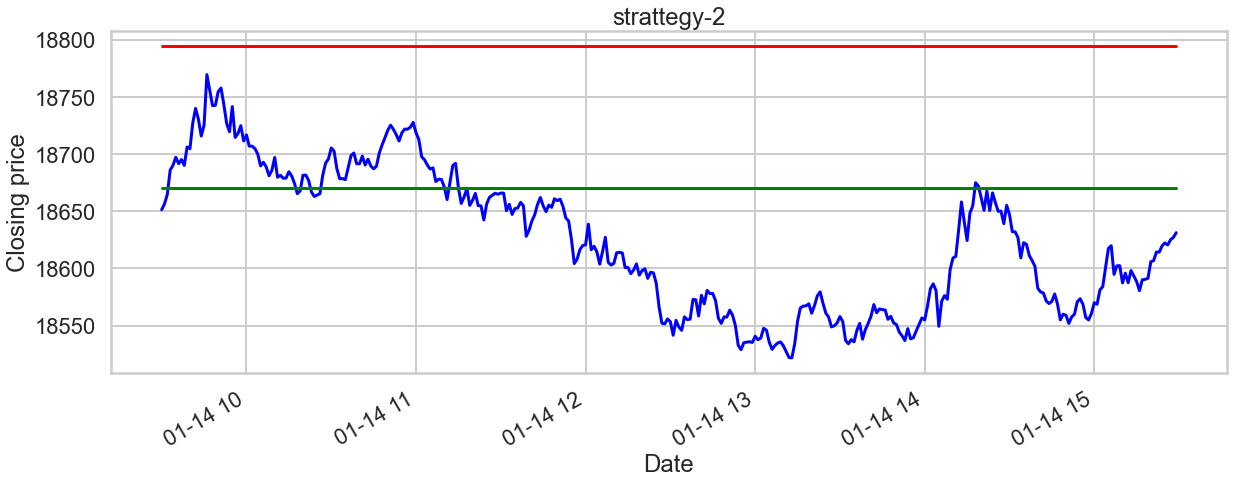

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
fig = plt.figure(figsize = (20,7))

sns.lineplot(x = "date_time", y = "open", data=x,
             palette = "hot"
             ,color="blue"
            )
sns.lineplot(x = "date_time", y = "fif_min_open", data=x,
             palette = "hot"
             ,color="green"
            )
sns.lineplot(x = "date_time", y = "target", data=x,
             palette = "hot"
             ,color="red"
            )
fig.autofmt_xdate()

plt.title("strattegy-2") # for title
plt.xlabel("Date") # label for x-axis
plt.ylabel("Closing price") # label for y-axis
plt.show()

In [333]:
data2.head()

AttributeError: 'function' object has no attribute 'head'

In [195]:
data2['returns']=data2['open'].pct_change()

<ipython-input-195-b20591b51900>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['returns']=data2['open'].pct_change()


In [196]:
data3=data2

In [197]:
data3=data3.dropna()

In [198]:
data3.head()

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,fif_min_low,call,hour,min,target_long,stoploss_long,target_short,stoploss_short,position,returns
date_time,,,,,,,,,,,,,,,,,,,,
2015-01-12 09:32:00,2015-01-12 09:32:00,1/12/2015,18540.70,18562.35,18535.60,18562.35,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,32,18703.55,18488.9,18417.35,18632.0,0,-0.000469
2015-01-12 09:33:00,2015-01-12 09:33:00,1/12/2015,18562.35,18567.00,18556.35,18556.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,33,18703.55,18488.9,18417.35,18632.0,0,0.001168
2015-01-12 09:34:00,2015-01-12 09:34:00,1/12/2015,18561.75,18573.00,18556.60,18569.75,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,34,18703.55,18488.9,18417.35,18632.0,0,-0.000032
2015-01-12 09:35:00,2015-01-12 09:35:00,1/12/2015,18569.75,18575.15,18567.95,18572.60,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,35,18703.55,18488.9,18417.35,18632.0,0,0.000431
2015-01-12 09:36:00,2015-01-12 09:36:00,1/12/2015,18572.60,18576.35,18567.10,18568.40,18598.05,18632.0,18632.0,18560.45,18530.1,No trade,9,36,18703.55,18488.9,18417.35,18632.0,0,0.000153


In [199]:

data3["strategy"] = data3["position"].shift(1) * data3["returns"]
data3.dropna(inplace=True)
data3["creturns"] = (1+data3["returns"]).cumprod()-1
data3["cstrategy"] = (1+data3["strategy"]).cumprod()-1

# absolute performance of the strategy
perf = data3["cstrategy"].iloc[-1]
# out-/underperformance of strategy
outperf = perf - data3["creturns"].iloc[-1]

<ipython-input-199-51e32ea0f98b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["strategy"] = data3["position"].shift(1) * data3["returns"]
<ipython-input-199-51e32ea0f98b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.dropna(inplace=True)
<ipython-input-199-51e32ea0f98b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [200]:
cagr=perf

In [201]:
cagr

0.15176266519178894

<AxesSubplot:xlabel='date_time'>

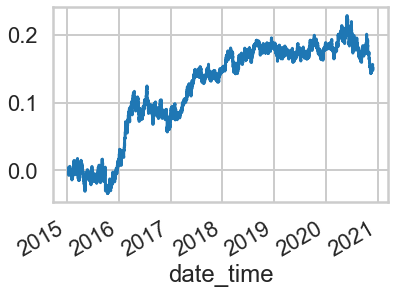

In [202]:
data3['cstrategy'].plot()

In [293]:
# if $ 100 is invested daily
data3['profit']=data3['open'][0]*data3['cstrategy']*25

<ipython-input-293-24e3db7fd900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['profit']=data3['open'][0]*data3['cstrategy']*25


<AxesSubplot:xlabel='date_time'>

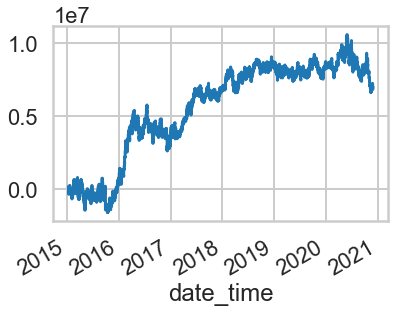

In [281]:
data3['profit'].plot()

In [204]:
total_profit=sum(data3['profit'])

In [205]:
total_profit

15.168649770322837

<AxesSubplot:xlabel='date_time'>

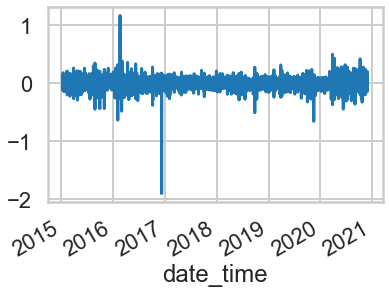

In [125]:
data3['profit'].plot()

In [126]:
data3.head(50)

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,...,min,target,stoploss,position,returns,strategy,creturns,cstrategy,profit,drawdown
date_time,,,,,,,,,,,,,,,,,,,,,
2015-01-12 09:33:00,2015-01-12 09:33:00,1/12/2015,18562.35,18567.00,18556.35,18556.60,18598.05,18632.0,18632.0,18560.45,...,33,18703.55,18488.9,0,0.001168,0.000000,0.001168,0.000000,0.000000,0.000000
2015-01-12 09:34:00,2015-01-12 09:34:00,1/12/2015,18561.75,18573.00,18556.60,18569.75,18598.05,18632.0,18632.0,18560.45,...,34,18703.55,18488.9,0,-0.000032,-0.000000,0.001135,0.000000,-0.000000,0.000000
2015-01-12 09:35:00,2015-01-12 09:35:00,1/12/2015,18569.75,18575.15,18567.95,18572.60,18598.05,18632.0,18632.0,18560.45,...,35,18703.55,18488.9,0,0.000431,0.000000,0.001567,0.000000,0.000000,0.000000
2015-01-12 09:36:00,2015-01-12 09:36:00,1/12/2015,18572.60,18576.35,18567.10,18568.40,18598.05,18632.0,18632.0,18560.45,...,36,18703.55,18488.9,0,0.000153,0.000000,0.001721,0.000000,0.000000,0.000000
2015-01-12 09:37:00,2015-01-12 09:37:00,1/12/2015,18568.40,18576.10,18568.40,18574.90,18598.05,18632.0,18632.0,18560.45,...,37,18703.55,18488.9,0,-0.000226,-0.000000,0.001494,0.000000,-0.000000,0.000000
2015-01-12 09:38:00,2015-01-12 09:38:00,1/12/2015,18574.45,18575.95,18569.15,18570.30,18598.05,18632.0,18632.0,18560.45,...,38,18703.55,18488.9,0,0.000326,0.000000,0.001820,0.000000,0.000000,0.000000
2015-01-12 09:39:00,2015-01-12 09:39:00,1/12/2015,18570.30,18570.80,18563.70,18564.05,18598.05,18632.0,18632.0,18560.45,...,39,18703.55,18488.9,0,-0.000223,-0.000000,0.001596,0.000000,-0.000000,0.000000
2015-01-12 09:40:00,2015-01-12 09:40:00,1/12/2015,18564.05,18570.20,18558.40,18570.20,18598.05,18632.0,18632.0,18560.45,...,40,18703.55,18488.9,0,-0.000337,-0.000000,0.001259,0.000000,-0.000000,0.000000
2015-01-12 09:41:00,2015-01-12 09:41:00,1/12/2015,18570.20,18583.60,18568.95,18579.70,18598.05,18632.0,18632.0,18560.45,...,41,18703.55,18488.9,0,0.000331,0.000000,0.001591,0.000000,0.000000,0.000000


In [206]:
win_streak=[]
lose_streak=[]
wi=0
lo=0
for i in range(len(data3)):
    if(data3['profit'][i]>0):
        wi=wi+1
        lo=0
        win_streak.append(wi)
        lose_streak.append(lo)
        
    elif(data3['profit'][i]<0):
        lo=lo+1
        wi=0
        lose_streak.append(lo)
        win_streak.append(wi)
    else:
        lose_streak.append(0)
        win_streak.append(0)
        

In [207]:
max(lose_streak)

15

In [208]:
max(win_streak)

20

In [209]:
data3['win_streak']=win_streak
data3['lose_streak']=lose_streak

<ipython-input-209-4229bf6a6f01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['win_streak']=win_streak
<ipython-input-209-4229bf6a6f01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['lose_streak']=lose_streak


In [211]:
data3.head(60)

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,...,target_short,stoploss_short,position,returns,strategy,creturns,cstrategy,profit,win_streak,lose_streak
date_time,,,,,,,,,,,,,,,,,,,,,
2015-01-12 09:33:00,2015-01-12 09:33:00,1/12/2015,18562.35,18567.00,18556.35,18556.60,18598.05,18632.0,18632.0,18560.45,...,18417.35,18632.0,0,0.001168,0.000000,0.001168,0.000000,0.000000,0,0
2015-01-12 09:34:00,2015-01-12 09:34:00,1/12/2015,18561.75,18573.00,18556.60,18569.75,18598.05,18632.0,18632.0,18560.45,...,18417.35,18632.0,0,-0.000032,-0.000000,0.001135,0.000000,-0.000000,0,0
2015-01-12 09:35:00,2015-01-12 09:35:00,1/12/2015,18569.75,18575.15,18567.95,18572.60,18598.05,18632.0,18632.0,18560.45,...,18417.35,18632.0,0,0.000431,0.000000,0.001567,0.000000,0.000000,0,0
2015-01-12 09:36:00,2015-01-12 09:36:00,1/12/2015,18572.60,18576.35,18567.10,18568.40,18598.05,18632.0,18632.0,18560.45,...,18417.35,18632.0,0,0.000153,0.000000,0.001721,0.000000,0.000000,0,0
2015-01-12 09:37:00,2015-01-12 09:37:00,1/12/2015,18568.40,18576.10,18568.40,18574.90,18598.05,18632.0,18632.0,18560.45,...,18417.35,18632.0,0,-0.000226,-0.000000,0.001494,0.000000,-0.000000,0,0
2015-01-12 09:38:00,2015-01-12 09:38:00,1/12/2015,18574.45,18575.95,18569.15,18570.30,18598.05,18632.0,18632.0,18560.45,...,18417.35,18632.0,0,0.000326,0.000000,0.001820,0.000000,0.000000,0,0
2015-01-12 09:39:00,2015-01-12 09:39:00,1/12/2015,18570.30,18570.80,18563.70,18564.05,18598.05,18632.0,18632.0,18560.45,...,18417.35,18632.0,0,-0.000223,-0.000000,0.001596,0.000000,-0.000000,0,0
2015-01-12 09:40:00,2015-01-12 09:40:00,1/12/2015,18564.05,18570.20,18558.40,18570.20,18598.05,18632.0,18632.0,18560.45,...,18417.35,18632.0,0,-0.000337,-0.000000,0.001259,0.000000,-0.000000,0,0
2015-01-12 09:41:00,2015-01-12 09:41:00,1/12/2015,18570.20,18583.60,18568.95,18579.70,18598.05,18632.0,18632.0,18560.45,...,18417.35,18632.0,0,0.000331,0.000000,0.001591,0.000000,0.000000,0,0


In [234]:
tot_trades=len(data3[data3['call']=='buy'])+len(data3[data3['call']=='sell'])

In [235]:
tot_trades

1010

In [140]:
prof_trades=len(data3[data3['profit']>0])
los_trades=len(data3[data3['profit']<0])

In [315]:
pro=0
profit=[]
los=0
loss=[]
bu=1
se=1
for i in range(len(data3)):
    if(data3['call'][i]=='Buy_Hold' or data3['call'][i]=='buy'):
        if(data3['call'][i]=='buy'):
            price_buy=data3['open'][i]
        bu=bu*(1+data3['strategy'][i])
        if(se>1):
            pro=pro+1
            profit.append((se-1)*price_sell*25)
            se=1
            
            
        elif(se<1):
            loss.append((se-1)*price_sell*25)
            se=1
            los=los+1
            
    elif(data3['call'][i]=='Sell_Hold' or data3['call'][i]=='sell'):
        if(data3['call'][i]=='sell'):
            price_sell=data3['open'][i]
        se=se*(1+data3['strategy'][i])
        
        if(bu>1):
            pro=pro+1
            profit.append((bu-1)*price_buy*25)
            bu=1
            
        elif(bu<1):
            loss.append((bu-1)*price_buy*25)
            bu=1
            los=los+1
            
    elif(data3['call'][i]=='exit'):
        if(se>1):
            pro=pro+1
            profit.append((se-1)*price_sell*25)
            se=1
            
        elif(se<1):
            loss.append((se-1)*price_sell*25)
            se=1
            los=los+1
            
        if(bu>1):
            pro=pro+1
            profit.append((bu-1)*price_buy*25)
            bu=1
            
        elif(bu<1):
            loss.append((bu-1)*price_buy*25)
            bu=1
            los=los+1
            
    

In [313]:
len(profit)

498

In [317]:
sum(profit)

803620.1268232416

In [318]:
sum(loss)

-747367.5864462826

In [319]:
profit_factor=sum(profit)/sum(loss)

In [320]:
profit_factor

-1.0752675676562837

In [307]:
los

404

In [308]:
pro

498

In [243]:
tot_trades=pro+los

In [244]:
tot_trades

902

In [245]:
win_ratio=pro/tot_trades

In [246]:
win_ratio

0.5521064301552107

In [247]:
cagr

0.15176266519178894

In [248]:
wealth_index=100*(1+data3['strategy']).cumprod()
previous_peak=wealth_index.cummax()
drawdown=(wealth_index-previous_peak)/previous_peak

In [249]:
min(drawdown)

-0.0697660759731949

In [250]:
data3['drawdown']=drawdown

<ipython-input-250-dce42b30b15a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['drawdown']=drawdown


In [254]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
   
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

In [258]:
ann=annualize_rets(data3['strategy'],252*375)

In [259]:
ann

0.025927261160340942

In [260]:
std=data3['strategy'].std()*((252*375)**0.5)

In [261]:
std

0.061345431660808136

In [262]:
sharpe_ratio=(ann-0.03)/std

In [263]:
sharpe_ratio

-0.06639025481437788

In [265]:
mar=cagr/-min(data3['drawdown'])

In [266]:
mar

2.175307455303897

In [283]:
tot_prof=sum(data3[data3['profit']>0]['profit'])

In [284]:
tot_prof

2952847224236.8604

In [285]:
tot_loss=sum(data3[data3['profit']<0]['profit'])

In [286]:
tot_loss

-35071376386.87726

In [287]:
profit_factor=tot_prof/tot_loss

In [288]:
profit_factor

-84.19536181481986

In [252]:
data3.head(60)

,date_time,date,open,high,low,close,close_prev_day,fif_min_high,fif_min_open,fif_min_close,...,stoploss_short,position,returns,strategy,creturns,cstrategy,profit,win_streak,lose_streak,drawdown
date_time,,,,,,,,,,,,,,,,,,,,,
2015-01-12 09:33:00,2015-01-12 09:33:00,1/12/2015,18562.35,18567.00,18556.35,18556.60,18598.05,18632.0,18632.0,18560.45,...,18632.0,0,0.001168,0.000000,0.001168,0.000000,0.000000,0,0,0.000000
2015-01-12 09:34:00,2015-01-12 09:34:00,1/12/2015,18561.75,18573.00,18556.60,18569.75,18598.05,18632.0,18632.0,18560.45,...,18632.0,0,-0.000032,-0.000000,0.001135,0.000000,-0.000000,0,0,0.000000
2015-01-12 09:35:00,2015-01-12 09:35:00,1/12/2015,18569.75,18575.15,18567.95,18572.60,18598.05,18632.0,18632.0,18560.45,...,18632.0,0,0.000431,0.000000,0.001567,0.000000,0.000000,0,0,0.000000
2015-01-12 09:36:00,2015-01-12 09:36:00,1/12/2015,18572.60,18576.35,18567.10,18568.40,18598.05,18632.0,18632.0,18560.45,...,18632.0,0,0.000153,0.000000,0.001721,0.000000,0.000000,0,0,0.000000
2015-01-12 09:37:00,2015-01-12 09:37:00,1/12/2015,18568.40,18576.10,18568.40,18574.90,18598.05,18632.0,18632.0,18560.45,...,18632.0,0,-0.000226,-0.000000,0.001494,0.000000,-0.000000,0,0,0.000000
2015-01-12 09:38:00,2015-01-12 09:38:00,1/12/2015,18574.45,18575.95,18569.15,18570.30,18598.05,18632.0,18632.0,18560.45,...,18632.0,0,0.000326,0.000000,0.001820,0.000000,0.000000,0,0,0.000000
2015-01-12 09:39:00,2015-01-12 09:39:00,1/12/2015,18570.30,18570.80,18563.70,18564.05,18598.05,18632.0,18632.0,18560.45,...,18632.0,0,-0.000223,-0.000000,0.001596,0.000000,-0.000000,0,0,0.000000
2015-01-12 09:40:00,2015-01-12 09:40:00,1/12/2015,18564.05,18570.20,18558.40,18570.20,18598.05,18632.0,18632.0,18560.45,...,18632.0,0,-0.000337,-0.000000,0.001259,0.000000,-0.000000,0,0,0.000000
2015-01-12 09:41:00,2015-01-12 09:41:00,1/12/2015,18570.20,18583.60,18568.95,18579.70,18598.05,18632.0,18632.0,18560.45,...,18632.0,0,0.000331,0.000000,0.001591,0.000000,0.000000,0,0,0.000000


In [301]:
net_profit=data3['profit'][-1]

In [302]:
net_profit

70426.79270557007

In [291]:
data3['cstrategy'][-1]

0.15176266519178894

In [292]:
0.15*18562*25

69607.5

In [297]:
data3.to_csv('Buy_strategy2.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")


class SMABacktester():
    ''' Class for the vectorized backtesting of SMA-based trading strategies.
    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    SMA_S: int
        time window in days for shorter SMA
    SMA_L: int
        time window in days for longer SMA
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
        
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    set_parameters:
        sets one or two new SMA parameters
        
    test_strategy:
        runs the backtest for the SMA-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
        
    update_and_run:
        updates SMA parameters and returns the negative absolute performance (for minimization algorithm)
        
    optimize_parameters:
        implements a brute force optimization for the two SMA parameters
    '''
    
    def __init__(self, SMA_S, SMA_L, start, end):
        
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None 
        self.get_data()
        
    def __repr__(self):
        return "SMABacktester( SMA_S = {}, SMA_L = {}, start = {}, end = {})".format( self.SMA_S, self.SMA_L, self.start, self.end)
        
    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        raw = x2
        raw = x2.loc[:,["close",'hour','min']]
        #raw=X.loc[:,'close']
        raw = raw.loc[self.start:self.end]
        
        raw.rename(columns={"close": "price"}, inplace=True)
        raw['returns']=raw['price'].pct_change()
        #raw["returns"] = np.log(raw['price'] / raw['price'].shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and resp. time series.
        '''
        
        if SMA_S is not None:
            
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
#         for i in range(len(data)):
#             if((data['hour'][i] >= 15) and (data['min'][i] >= 15)):
#                 data['position'][i]=0
        #data[(data['hour']>=15) & (data['min']>=15)]['position']=0
        
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = (1+data["returns"]).cumprod()-1
        data["cstrategy"] = (1+data["strategy"]).cumprod()-1
        self.results = data
        # absolute performance of the strategy
        perf = data["cstrategy"].iloc[-1]
        # out-/underperformance of strategy
        outperf = perf - data["creturns"].iloc[-1]
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = " SMA_S = {} | SMA_L = {}".format( self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
        
    def update_and_run(self, SMA):
        ''' Updates SMA parameters and returns the negative absolute performance (for minimazation algorithm).
        Parameters
        ==========
        SMA: tuple
            SMA parameter tuple
        '''
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, SMA1_range, SMA2_range):
        ''' Finds global maximum given the SMA parameter ranges.
        Parameters
        ==========
        SMA1_range, SMA2_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        return opt, -self.update_and_run(opt)